In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [233]:
hits =pd.read_csv("songs_normalize.csv")
hits.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [6]:
hits.info

<bound method DataFrame.info of               artist                                    song  duration_ms  \
0     Britney Spears                  Oops!...I Did It Again       211160   
1          blink-182                    All The Small Things       167066   
2         Faith Hill                                 Breathe       250546   
3           Bon Jovi                            It's My Life       224493   
4             *NSYNC                             Bye Bye Bye       200560   
...              ...                                     ...          ...   
1995  Jonas Brothers                                  Sucker       181026   
1996    Taylor Swift                            Cruel Summer       178426   
1997    Blanco Brown                              The Git Up       200593   
1998       Sam Smith  Dancing With A Stranger (with Normani)       171029   
1999     Post Malone                                 Circles       215280   

      explicit  year  popularity  danceabil

In [7]:
#data cleaning. Checking for null values
hits.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [8]:
#No NA found so checking for duplicates
hits.duplicated().any()

True

In [241]:
dup = hits.duplicated(subset=['song'])

In [242]:
a = np.asarray(dup) 


array([False, False, False, ..., False, False, False])

In [10]:
hits.drop_duplicates(subset=['song'])

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [11]:
#Exploratory Data Analysis: How many different music genre are in the Top
hits.groupby(['genre']).size().reset_index(name='counts').sort_values('counts', ascending=False)

,genre,counts
30,pop,428
19,"hip hop, pop",277
21,"hip hop, pop, R&B",244
31,"pop, Dance/Electronic",221
33,"pop, R&B",178
14,hip hop,124
20,"hip hop, pop, Dance/Electronic",78
44,rock,58
54,"rock, pop",43
0,Dance/Electronic,41


In [232]:
#Let's group similar genre to make the data more readable

def category(genre):
    
    if 'pop' in genre or 'R&B' in genre:
        return 'Pop'
    
    elif 'rap' in genre or 'hip hop' in genre:
        return 'Hip hop'
    
    elif 'rock' in genre or 'metal'in genre:
        return 'Rock'
    
    else:
        return 'Others'
    
hits['top genre'] = hits['genre'].apply(category)

hits.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,top genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,Pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",Pop
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",Pop
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",Rock
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,Pop


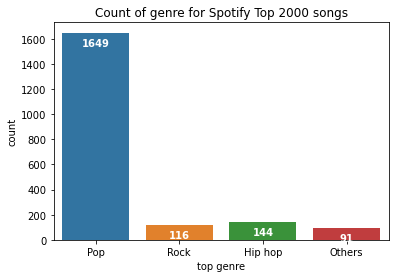

In [14]:
# Ploting the top music genre
genre_cplot = sns.countplot(x=hits['top genre'])

for p in genre_cplot.patches:
    genre_cplot.annotate(p.get_height(),
                           (p.get_x() + p.get_width() / 2.,
                            p.get_height()),
                            ha='center',
                            va='center',
                            xytext=(0, -10),
                            textcoords='offset points',
                            color='white',
                            fontsize=10,
                            fontweight='bold')
    
plt.title('Count of genre for Spotify Top 2000 songs')
plt.show()

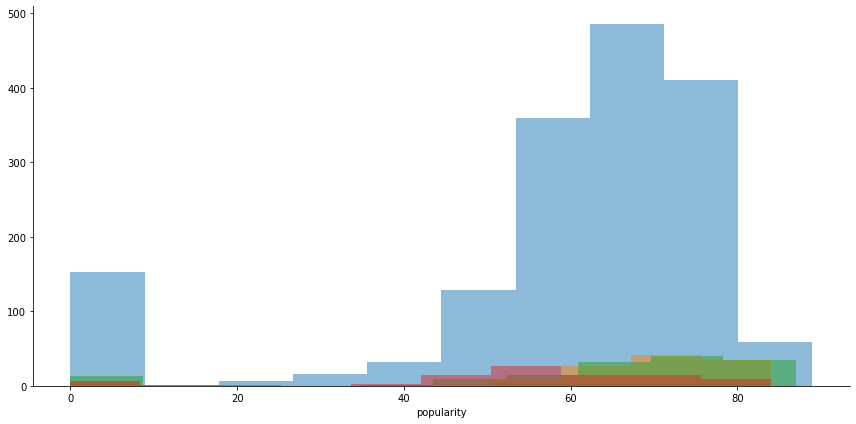

In [15]:
#Checking popularity distribution per music genre

g = sns.FacetGrid(data=hits, hue='top genre', height=6, aspect=2)
g = g.map(plt.hist, 'popularity', alpha=0.5)

In [218]:
#Number of diferent artists with songs in the Top

art = hits['artist']
hits_art = art.value_counts()
hits_art

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

/Users/filipa_zambujal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


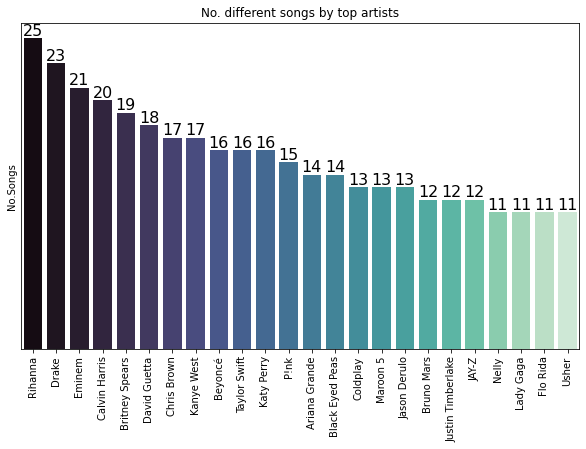

In [244]:
# Artists with more than 10 songs on the top

top_art = hits_art[hits_art > 10]

plt.figure(figsize=(10,6))
plt.title('No. different songs by top artists')
g=sns.barplot(top_art.index, top_art, palette='mako')
g.bar_label(g.containers[0], fmt='%.0f', fontsize=16)
plt.xticks(rotation=90)
plt.yticks([])
plt.ylabel('No.Songs')
plt.show()

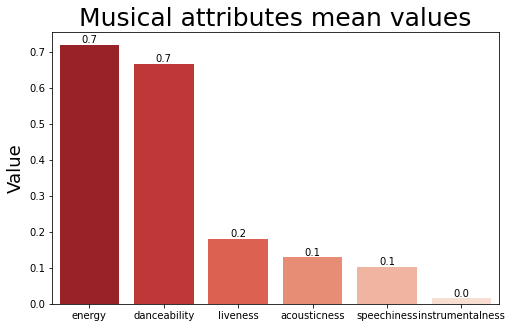

In [143]:
#What are the attributes of the most popular songs?

hits_attributes = hits[["danceability", "energy", "speechiness","acousticness", "instrumentalness", "liveness"]]

hits_mean = pd.DataFrame(hits_attributes.mean().sort_values(ascending=False).reset_index())
hits_mean.rename(columns={ hits_mean.columns[1]: "value" }, inplace = True)

plt.figure(figsize=(8,5))
plt.title('Musical attributes mean values', fontsize=25)
g = sns.barplot(x='index', y='value', data=hits_mean, palette='Reds_r')
g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
plt.xlabel('')
plt.xticks(fontsize=10)
plt.ylabel('Value', fontsize=18)
plt.yticks(fontsize=10)
plt.show()

Text(0, 0.5, 'Energy Levels')

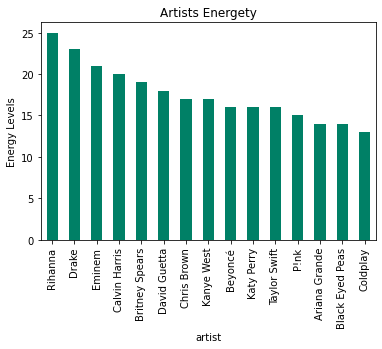

In [260]:
#Songs with more energy

energy = hits.groupby('artist')['energy'].count().nlargest(15).plot(kind='bar', \
               title='Artists Energety', \
               colormap='summer',  )
energy.set_ylabel('Energy Levels')


In [298]:
#In the following, musical numerical features will be analyzed and compared to the top 5 artists
topartists = hits[hits['artist'].isin(['Rihanna','Drake', 'Eminem','Calvin Harris', 'Britney Spears'])]
topartists

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
34,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4.842,0,0.0454,0.1160,0.000465,0.0710,0.686,84.110,pop
98,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5.707,1,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop
102,Eminem,Stan,404106,True,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.0371,0.000002,0.5180,0.507,80.063,hip hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Drake,In My Feelings,217925,True,2018,75,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.3960,0.350,91.030,"hip hop, pop, R&B"
1886,Drake,I'm Upset,214466,True,2018,68,0.899,0.586,11,-7.866,0,0.3430,0.2790,0.000000,0.0836,0.492,150.002,"hip hop, pop, R&B"
1897,Drake,Nice For What,210746,True,2018,77,0.585,0.909,8,-6.474,1,0.0707,0.0891,0.000097,0.1190,0.758,93.372,"hip hop, pop, R&B"
1938,Drake,Money In The Grave (Drake ft. Rick Ross),205426,True,2019,76,0.831,0.502,10,-4.045,0,0.0460,0.1010,0.000000,0.1220,0.101,100.541,"hip hop, pop, R&B"


In [307]:
def plot_features(df,string):
    fig, ax = plt.subplots(2,3, figsize=(18,9), sharey=True)
    fig.suptitle('TOP 5 artists musical attributes', fontsize=40)
    g=sns.barplot(ax=ax[0,0], x=string, y= 'energy', data=df,ci=False, palette='rocket')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[0,0].set_title('energy')
    ax[0,0].set_xlabel('')
    ax[0,0].set_ylabel('')
    ax[0,0].tick_params(axis='y',labelsize=17)
    
    g=sns.barplot(ax=ax[0,1], x=string, y= 'danceability', data=df,ci=False, palette='crest_r')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[0,1].set_title('danceability')
    ax[0,1].set_ylabel('')
    ax[0,1].set_xlabel('')
    
    g=sns.barplot(ax=ax[0,2], x=string, y= 'liveness', data=df,ci=False, palette='magma')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[0,2].set_title('liveness')
    ax[0,2].set_ylabel('')
    ax[0,2].set_xlabel('')
    
    g=sns.barplot(ax=ax[1,0], x=string, y= 'acousticness', data=df,ci=False, palette='mako')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[1,0].set_title('acousticness')
    ax[1,0].set_ylabel('')
    ax[1,0].set_xlabel('')
    ax[1,0].tick_params(axis='y',labelsize=17)
    
    g=sns.barplot(ax=ax[1,1], x=string, y= 'speechiness', data=df,ci=False, palette='cubehelix')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[1,1].set_title('speechiness')
    ax[1,1].set_ylabel('')
    ax[1,1].set_xlabel('')
    
    g=sns.barplot(ax=ax[1,2], x=string, y= 'energy', data=df,ci=False, palette='flare_r')
    g.bar_label(g.containers[0], fmt='%.1f', fontsize=10)
    ax[1,2].set_title('energy')
    ax[1,2].set_ylabel('')
    ax[1,2].set_xlabel('')  

   
    plt.tight_layout()
    plt.show()

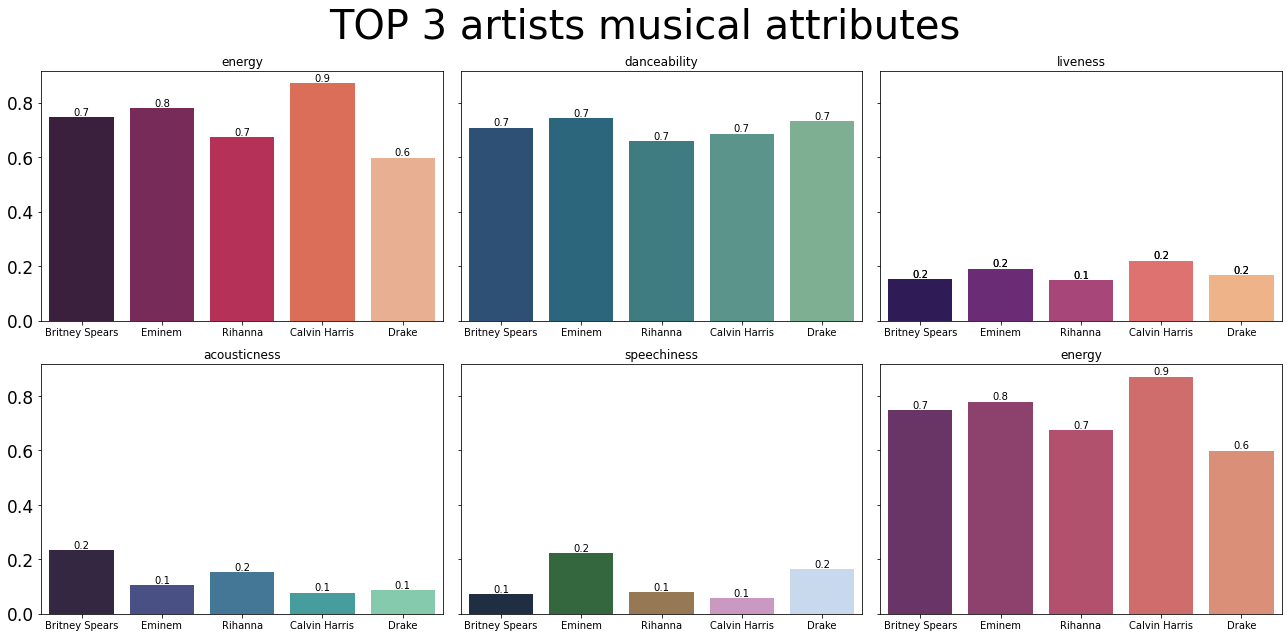

In [308]:
plot_features(topartists, "artist")